# LSTM by tensorflow

In [1]:
from tensorflow.keras.layers import Input, SimpleRNN, GRU, LSTM, Dense, Flatten, GlobalMaxPool1D
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import SGD, Adam

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# -Linear model with short distance

## Step 1:  Load the data

Let's create a data

For y, we will label in either 0 or 1.  For a 3 dimension vector, we have 8 quadrants.  We label them opposite 4 quadrants with 1, and other 4 quadrants with 0.  

In [2]:
def get_label(x, i1, i2, i3):
  # x = sequence
  if x[i1] < 0 and x[i2] < 0 and x[i3] < 0:
    return 1
  if x[i1] < 0 and x[i2] > 0 and x[i3] > 0:
    return 1
  if x[i1] > 0 and x[i2] < 0 and x[i3] > 0:
    return 1
  if x[i1] > 0 and x[i2] > 0 and x[i3] < 0:
    return 1
  return 0

In [3]:
T = 10
D = 1
X = []
Y = []

for t in range(5000):
    x = np.random.randn(T)
    X.append(x)
    y = get_label(x, -1, -2, -3) # short distance
#   y = get_label(x, 0, 1, 2) # long distance
    Y.append(y)

X = np.array(X)
Y = np.array(Y)
N = len(X)

## Step 2 : Build the model

Let's build a linear model.  

In [4]:
i = Input(shape=(T,))
x = Dense(1, activation = 'sigmoid')(i)

model = Model(i,x)

In [5]:
model.compile(loss = 'binary_crossentropy', optimizer = Adam(lr = 0.01), metrics=['accuracy'])

## Step 3: Train

In [6]:
r = model.fit(X, Y, epochs = 100, validation_split = 0.5)

Epoch 1/100
79/79 [==============================] - 0s 2ms/step - loss: 0.7939 - accuracy: 0.5092 - val_loss: 0.7075 - val_accuracy: 0.5152
Epoch 2/100
79/79 [==============================] - 0s 1ms/step - loss: 0.6983 - accuracy: 0.5052 - val_loss: 0.6936 - val_accuracy: 0.5056
Epoch 3/100
79/79 [==============================] - 0s 1ms/step - loss: 0.6944 - accuracy: 0.5068 - val_loss: 0.6941 - val_accuracy: 0.5044
Epoch 4/100
79/79 [==============================] - 0s 2ms/step - loss: 0.6938 - accuracy: 0.5116 - val_loss: 0.6944 - val_accuracy: 0.5072
Epoch 5/100
79/79 [==============================] - 0s 2ms/step - loss: 0.6943 - accuracy: 0.5076 - val_loss: 0.6936 - val_accuracy: 0.5120
Epoch 6/100
79/79 [==============================] - 0s 2ms/step - loss: 0.6939 - accuracy: 0.5132 - val_loss: 0.6934 - val_accuracy: 0.5096
Epoch 7/100
79/79 [==============================] - 0s 1ms/step - loss: 0.6939 - accuracy: 0.5128 - val_loss: 0.6945 - val_accuracy: 0.5068
Epoch 8/100
7

Epoch 59/100
79/79 [==============================] - 0s 1ms/step - loss: 0.6946 - accuracy: 0.5136 - val_loss: 0.6957 - val_accuracy: 0.4944
Epoch 60/100
79/79 [==============================] - 0s 1ms/step - loss: 0.6941 - accuracy: 0.4964 - val_loss: 0.6943 - val_accuracy: 0.5012
Epoch 61/100
79/79 [==============================] - 0s 1ms/step - loss: 0.6936 - accuracy: 0.5096 - val_loss: 0.6945 - val_accuracy: 0.5040
Epoch 62/100
79/79 [==============================] - 0s 2ms/step - loss: 0.6945 - accuracy: 0.4952 - val_loss: 0.6940 - val_accuracy: 0.5068
Epoch 63/100
79/79 [==============================] - 0s 1ms/step - loss: 0.6937 - accuracy: 0.5140 - val_loss: 0.6945 - val_accuracy: 0.5024
Epoch 64/100
79/79 [==============================] - 0s 1ms/step - loss: 0.6940 - accuracy: 0.5052 - val_loss: 0.6938 - val_accuracy: 0.5060
Epoch 65/100
79/79 [==============================] - 0s 1ms/step - loss: 0.6936 - accuracy: 0.5076 - val_loss: 0.6946 - val_accuracy: 0.4952
Epoch 

## Step 4: Evaluation

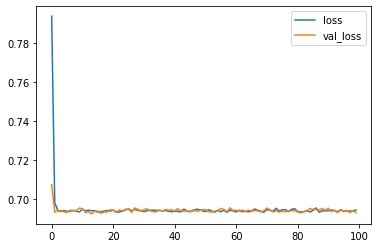

In [7]:
plt.plot(r.history['loss'], label='loss')
plt.plot(r.history['val_loss'], label='val_loss')
plt.legend()

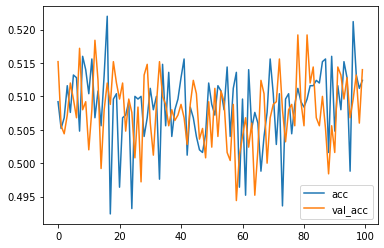

In [8]:
plt.plot(r.history['accuracy'], label='acc')
plt.plot(r.history['val_accuracy'], label='val_acc')
plt.legend()

## Step 5: Prediction

It is quite useless to make a prediction since the accuracy is so poor.  

# -Simple RNN model with short distance

## Step 1: Load the data

We will use the same data. Only difference is we need to change the dimesion of X to $N \times T \times D$.  

In [9]:
print(X.shape)
inputs = np.expand_dims(X, -1)
print(inputs.shape)

(5000, 10)
(5000, 10, 1)


## Step 2: Build the model

We choose $M = 5$, the number of nodes in hidden layer. 

In [10]:
M = 5

i = Input(shape=(T,D))
x = SimpleRNN(M)(i)
x = Dense(1, activation='sigmoid')(x)

model = Model(i,x)

model.compile(loss='binary_crossentropy', optimizer=Adam(lr=0.01), metrics=['accuracy'],)

## Step 3: Train

In [11]:
r = model.fit(inputs, Y, epochs = 200, validation_split = 0.5,)

Epoch 1/200
79/79 [==============================] - 0s 4ms/step - loss: 0.7084 - accuracy: 0.5016 - val_loss: 0.6914 - val_accuracy: 0.5268
Epoch 2/200
79/79 [==============================] - 0s 3ms/step - loss: 0.6920 - accuracy: 0.5204 - val_loss: 0.6913 - val_accuracy: 0.5296
Epoch 3/200
79/79 [==============================] - 0s 2ms/step - loss: 0.6867 - accuracy: 0.5368 - val_loss: 0.6859 - val_accuracy: 0.5080
Epoch 4/200
79/79 [==============================] - 0s 3ms/step - loss: 0.6729 - accuracy: 0.5528 - val_loss: 0.6619 - val_accuracy: 0.5804
Epoch 5/200
79/79 [==============================] - 0s 3ms/step - loss: 0.6510 - accuracy: 0.6204 - val_loss: 0.6360 - val_accuracy: 0.6620
Epoch 6/200
79/79 [==============================] - 0s 3ms/step - loss: 0.6120 - accuracy: 0.6836 - val_loss: 0.5859 - val_accuracy: 0.7024
Epoch 7/200
79/79 [==============================] - 0s 3ms/step - loss: 0.5620 - accuracy: 0.7400 - val_loss: 0.5281 - val_accuracy: 0.7720
Epoch 8/200
7

Epoch 59/200
79/79 [==============================] - 0s 3ms/step - loss: 0.0603 - accuracy: 0.9836 - val_loss: 0.0860 - val_accuracy: 0.9788
Epoch 60/200
79/79 [==============================] - 0s 3ms/step - loss: 0.0606 - accuracy: 0.9820 - val_loss: 0.0823 - val_accuracy: 0.9764
Epoch 61/200
79/79 [==============================] - 0s 3ms/step - loss: 0.0762 - accuracy: 0.9788 - val_loss: 0.0995 - val_accuracy: 0.9740
Epoch 62/200
79/79 [==============================] - 0s 3ms/step - loss: 0.0774 - accuracy: 0.9732 - val_loss: 0.0855 - val_accuracy: 0.9744
Epoch 63/200
79/79 [==============================] - 0s 3ms/step - loss: 0.0589 - accuracy: 0.9824 - val_loss: 0.0827 - val_accuracy: 0.9768
Epoch 64/200
79/79 [==============================] - 0s 3ms/step - loss: 0.0547 - accuracy: 0.9856 - val_loss: 0.0841 - val_accuracy: 0.9748
Epoch 65/200
79/79 [==============================] - 0s 3ms/step - loss: 0.0647 - accuracy: 0.9800 - val_loss: 0.0928 - val_accuracy: 0.9744
Epoch 

79/79 [==============================] - 0s 3ms/step - loss: 0.0505 - accuracy: 0.9880 - val_loss: 0.0777 - val_accuracy: 0.9852
Epoch 117/200
79/79 [==============================] - 0s 3ms/step - loss: 0.0423 - accuracy: 0.9864 - val_loss: 0.0775 - val_accuracy: 0.9844
Epoch 118/200
79/79 [==============================] - 0s 3ms/step - loss: 0.0439 - accuracy: 0.9864 - val_loss: 0.0708 - val_accuracy: 0.9840
Epoch 119/200
79/79 [==============================] - 0s 3ms/step - loss: 0.0408 - accuracy: 0.9892 - val_loss: 0.0665 - val_accuracy: 0.9828
Epoch 120/200
79/79 [==============================] - 0s 3ms/step - loss: 0.0389 - accuracy: 0.9872 - val_loss: 0.0591 - val_accuracy: 0.9848
Epoch 121/200
79/79 [==============================] - 0s 3ms/step - loss: 0.0364 - accuracy: 0.9908 - val_loss: 0.0676 - val_accuracy: 0.9848
Epoch 122/200
79/79 [==============================] - 0s 3ms/step - loss: 0.0445 - accuracy: 0.9856 - val_loss: 0.0688 - val_accuracy: 0.9836
Epoch 123/200

79/79 [==============================] - 0s 3ms/step - loss: 0.0533 - accuracy: 0.9884 - val_loss: 0.0596 - val_accuracy: 0.9860
Epoch 174/200
79/79 [==============================] - 0s 3ms/step - loss: 0.0426 - accuracy: 0.9880 - val_loss: 0.0681 - val_accuracy: 0.9888
Epoch 175/200
79/79 [==============================] - 0s 3ms/step - loss: 0.0341 - accuracy: 0.9880 - val_loss: 0.0583 - val_accuracy: 0.9876
Epoch 176/200
79/79 [==============================] - 0s 3ms/step - loss: 0.0484 - accuracy: 0.9892 - val_loss: 0.0623 - val_accuracy: 0.9892
Epoch 177/200
79/79 [==============================] - 0s 3ms/step - loss: 0.0288 - accuracy: 0.9924 - val_loss: 0.0616 - val_accuracy: 0.9868
Epoch 178/200
79/79 [==============================] - 0s 3ms/step - loss: 0.0266 - accuracy: 0.9940 - val_loss: 0.0689 - val_accuracy: 0.9864
Epoch 179/200
79/79 [==============================] - 0s 3ms/step - loss: 0.0285 - accuracy: 0.9896 - val_loss: 0.0637 - val_accuracy: 0.9880
Epoch 180/200

## Step 4: Evaluate

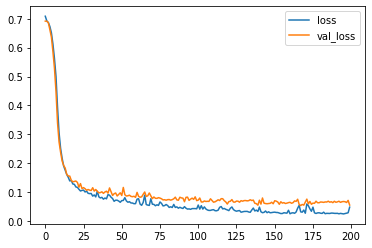

In [12]:
plt.plot(r.history['loss'], label='loss')
plt.plot(r.history['val_loss'], label='val_loss')
plt.legend()

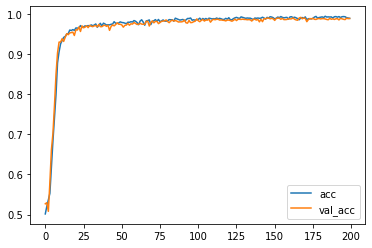

In [13]:
plt.plot(r.history['accuracy'], label='acc')
plt.plot(r.history['val_accuracy'], label='val_acc')
plt.legend()

## Step 5: Make a prediction

In [14]:
some_point = np.random.randn(10)

print(some_point)
print(some_point.shape)
inputs = some_point.reshape(1,10,1)
print(some_point.shape)

[ 0.59366629 -0.69409507 -0.15200083  0.30623072 -0.66212011 -0.21259486
  0.95558759  0.72934721  0.23209942 -1.51910599]
(10,)
(10,)


In [15]:
model.predict(inputs)[0][0]

0.99689543

In [16]:
get_label(some_point, -1,-2,-3)

1

# -Simple RNN with long distance

## Step 1: Load the data 

Let's create some data again.  

In [17]:
T = 10
D = 1
X = []
Y = []

for t in range(5000):
    x = np.random.randn(T)
    X.append(x)
     
    y = get_label(x, 0, 1, 2) # long distance
    Y.append(y)

X = np.array(X)
Y = np.array(Y)
N = len(X)

In [18]:
inputs = X.reshape(-1, T, D)
print(inputs.shape)

(5000, 10, 1)


## Step 2: Build the model

In [19]:
print(X[0], Y[0])

[-1.12688521  1.1665532  -0.78534554  0.55349521 -1.8110642   0.04843603
  1.64953752 -1.03845812  0.05457536  0.6343356 ] 0


In [20]:
M = 5
K = 1

i = Input(shape=(T,D))
x = SimpleRNN(M)(i)
x = Dense(K, activation = 'sigmoid')(x)

model = Model(i,x)

model.compile(loss = 'binary_crossentropy', optimizer = Adam(lr = 0.01), metrics = ['accuracy'])

## Step 3: Train

In [21]:
r = model.fit(X, Y, epochs = 200, validation_split = 0.5)

Epoch 1/200
79/79 [==============================] - 0s 5ms/step - loss: 0.7022 - accuracy: 0.5080 - val_loss: 0.6949 - val_accuracy: 0.4964
Epoch 2/200
79/79 [==============================] - 0s 3ms/step - loss: 0.6939 - accuracy: 0.5168 - val_loss: 0.6932 - val_accuracy: 0.5108
Epoch 3/200
79/79 [==============================] - 0s 3ms/step - loss: 0.6941 - accuracy: 0.5136 - val_loss: 0.6929 - val_accuracy: 0.5184
Epoch 4/200
79/79 [==============================] - 0s 2ms/step - loss: 0.6889 - accuracy: 0.5444 - val_loss: 0.6879 - val_accuracy: 0.5536
Epoch 5/200
79/79 [==============================] - 0s 3ms/step - loss: 0.6857 - accuracy: 0.5716 - val_loss: 0.6840 - val_accuracy: 0.5668
Epoch 6/200
79/79 [==============================] - 0s 3ms/step - loss: 0.6825 - accuracy: 0.5844 - val_loss: 0.6765 - val_accuracy: 0.5760
Epoch 7/200
79/79 [==============================] - 0s 3ms/step - loss: 0.6673 - accuracy: 0.6052 - val_loss: 0.6520 - val_accuracy: 0.6136
Epoch 8/200
7

Epoch 59/200
79/79 [==============================] - 0s 3ms/step - loss: 0.5816 - accuracy: 0.7144 - val_loss: 0.5933 - val_accuracy: 0.7200
Epoch 60/200
79/79 [==============================] - 0s 2ms/step - loss: 0.5887 - accuracy: 0.7124 - val_loss: 0.6904 - val_accuracy: 0.6180
Epoch 61/200
79/79 [==============================] - 0s 2ms/step - loss: 0.6514 - accuracy: 0.6376 - val_loss: 0.6566 - val_accuracy: 0.6280
Epoch 62/200
79/79 [==============================] - 0s 2ms/step - loss: 0.6219 - accuracy: 0.6668 - val_loss: 0.5936 - val_accuracy: 0.6992
Epoch 63/200
79/79 [==============================] - 0s 2ms/step - loss: 0.5651 - accuracy: 0.7324 - val_loss: 0.5011 - val_accuracy: 0.7828
Epoch 64/200
79/79 [==============================] - 0s 2ms/step - loss: 0.4971 - accuracy: 0.7824 - val_loss: 0.5298 - val_accuracy: 0.7656
Epoch 65/200
79/79 [==============================] - 0s 3ms/step - loss: 0.4540 - accuracy: 0.8124 - val_loss: 0.4220 - val_accuracy: 0.8376
Epoch 

79/79 [==============================] - 0s 3ms/step - loss: 0.5513 - accuracy: 0.7572 - val_loss: 0.5164 - val_accuracy: 0.7700
Epoch 117/200
79/79 [==============================] - 0s 3ms/step - loss: 0.4731 - accuracy: 0.8012 - val_loss: 0.4528 - val_accuracy: 0.8136
Epoch 118/200
79/79 [==============================] - 0s 3ms/step - loss: 0.4144 - accuracy: 0.8392 - val_loss: 0.4291 - val_accuracy: 0.8304
Epoch 119/200
79/79 [==============================] - 0s 3ms/step - loss: 0.3659 - accuracy: 0.8688 - val_loss: 0.3944 - val_accuracy: 0.8524
Epoch 120/200
79/79 [==============================] - 0s 3ms/step - loss: 0.3742 - accuracy: 0.8616 - val_loss: 0.5083 - val_accuracy: 0.7880
Epoch 121/200
79/79 [==============================] - 0s 3ms/step - loss: 0.6968 - accuracy: 0.6500 - val_loss: 0.7496 - val_accuracy: 0.5432
Epoch 122/200
79/79 [==============================] - 0s 3ms/step - loss: 0.7134 - accuracy: 0.5396 - val_loss: 0.6984 - val_accuracy: 0.5336
Epoch 123/200

79/79 [==============================] - 0s 3ms/step - loss: 0.3796 - accuracy: 0.8576 - val_loss: 0.5560 - val_accuracy: 0.6856
Epoch 174/200
79/79 [==============================] - 0s 3ms/step - loss: 0.5188 - accuracy: 0.7020 - val_loss: 0.5674 - val_accuracy: 0.6716
Epoch 175/200
79/79 [==============================] - 0s 3ms/step - loss: 0.6190 - accuracy: 0.6592 - val_loss: 0.6394 - val_accuracy: 0.6400
Epoch 176/200
79/79 [==============================] - 0s 3ms/step - loss: 0.6073 - accuracy: 0.6484 - val_loss: 0.6356 - val_accuracy: 0.6308
Epoch 177/200
79/79 [==============================] - 0s 3ms/step - loss: 0.6075 - accuracy: 0.6416 - val_loss: 0.6282 - val_accuracy: 0.6320
Epoch 178/200
79/79 [==============================] - 0s 3ms/step - loss: 0.6063 - accuracy: 0.6472 - val_loss: 0.6212 - val_accuracy: 0.6320
Epoch 179/200
79/79 [==============================] - 0s 3ms/step - loss: 0.5759 - accuracy: 0.6628 - val_loss: 0.6036 - val_accuracy: 0.6548
Epoch 180/200

## Step 4: Evaluate

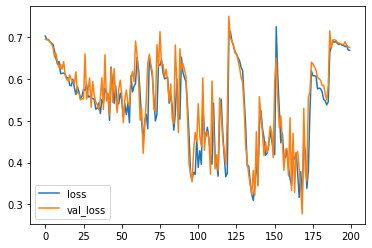

In [22]:
plt.plot(r.history['loss'], label='loss')
plt.plot(r.history['val_loss'], label='val_loss')
plt.legend()

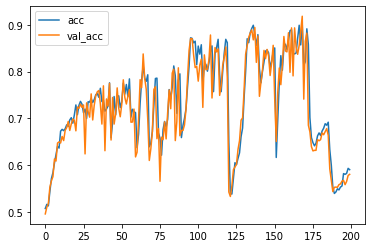

In [23]:
plt.plot(r.history['accuracy'], label='acc')
plt.plot(r.history['val_accuracy'], label='val_acc')
plt.legend()

## Step 5: Make a prediction

The accuracy is not good, so prediction is not necessary.  

Note that the Simple RNN did good work for short distance, but not for long distance.  

# -LSTM with long distance

## Step 1: Load the data

We will use the same data

## Step 2: Build the model

In [24]:
i = Input(shape = (T,D))
x = LSTM(5)(i)
x = Dense(1, activation = 'sigmoid')(x)

model = Model(i,x)
model.compile(loss = 'binary_crossentropy', optimizer = Adam(lr = 0.01), metrics = ['accuracy'])

## Step 3: Train

In [25]:
inputs = X.reshape(-1, T, D)
print(inputs.shape)

(5000, 10, 1)


In [26]:
r = model.fit(inputs, Y, epochs = 400, validation_split = 0.5)

Epoch 1/400
79/79 [==============================] - 1s 9ms/step - loss: 0.6948 - accuracy: 0.5000 - val_loss: 0.6935 - val_accuracy: 0.4848
Epoch 2/400
79/79 [==============================] - 0s 5ms/step - loss: 0.6936 - accuracy: 0.5068 - val_loss: 0.6941 - val_accuracy: 0.4892
Epoch 3/400
79/79 [==============================] - 0s 4ms/step - loss: 0.6933 - accuracy: 0.5108 - val_loss: 0.6942 - val_accuracy: 0.4920
Epoch 4/400
79/79 [==============================] - 0s 5ms/step - loss: 0.6933 - accuracy: 0.5048 - val_loss: 0.6954 - val_accuracy: 0.4912
Epoch 5/400
79/79 [==============================] - 0s 4ms/step - loss: 0.6934 - accuracy: 0.5044 - val_loss: 0.6947 - val_accuracy: 0.4936
Epoch 6/400
79/79 [==============================] - 0s 4ms/step - loss: 0.6932 - accuracy: 0.5140 - val_loss: 0.6970 - val_accuracy: 0.4872
Epoch 7/400
79/79 [==============================] - 0s 4ms/step - loss: 0.6927 - accuracy: 0.5160 - val_loss: 0.6951 - val_accuracy: 0.4904
Epoch 8/400
7

Epoch 59/400
79/79 [==============================] - 0s 4ms/step - loss: 0.2478 - accuracy: 0.9236 - val_loss: 0.2269 - val_accuracy: 0.9268
Epoch 60/400
79/79 [==============================] - 0s 4ms/step - loss: 0.1900 - accuracy: 0.9456 - val_loss: 0.2380 - val_accuracy: 0.9244
Epoch 61/400
79/79 [==============================] - 0s 4ms/step - loss: 0.2020 - accuracy: 0.9376 - val_loss: 0.2309 - val_accuracy: 0.9316
Epoch 62/400
79/79 [==============================] - 0s 4ms/step - loss: 0.1907 - accuracy: 0.9420 - val_loss: 0.2250 - val_accuracy: 0.9248
Epoch 63/400
79/79 [==============================] - 0s 4ms/step - loss: 0.1827 - accuracy: 0.9472 - val_loss: 0.1967 - val_accuracy: 0.9416
Epoch 64/400
79/79 [==============================] - 0s 4ms/step - loss: 0.1607 - accuracy: 0.9552 - val_loss: 0.1722 - val_accuracy: 0.9484
Epoch 65/400
79/79 [==============================] - 0s 4ms/step - loss: 0.1485 - accuracy: 0.9608 - val_loss: 0.1706 - val_accuracy: 0.9476
Epoch 

79/79 [==============================] - 0s 4ms/step - loss: 0.0787 - accuracy: 0.9808 - val_loss: 0.0795 - val_accuracy: 0.9812
Epoch 117/400
79/79 [==============================] - 0s 4ms/step - loss: 0.0771 - accuracy: 0.9816 - val_loss: 0.0980 - val_accuracy: 0.9736
Epoch 118/400
79/79 [==============================] - 0s 4ms/step - loss: 0.0869 - accuracy: 0.9772 - val_loss: 0.0845 - val_accuracy: 0.9800
Epoch 119/400
79/79 [==============================] - 0s 4ms/step - loss: 0.0847 - accuracy: 0.9788 - val_loss: 0.0909 - val_accuracy: 0.9788
Epoch 120/400
79/79 [==============================] - 0s 4ms/step - loss: 0.0758 - accuracy: 0.9828 - val_loss: 0.0843 - val_accuracy: 0.9816
Epoch 121/400
79/79 [==============================] - 0s 4ms/step - loss: 0.1055 - accuracy: 0.9732 - val_loss: 0.1352 - val_accuracy: 0.9708
Epoch 122/400
79/79 [==============================] - 0s 4ms/step - loss: 0.1583 - accuracy: 0.9616 - val_loss: 0.1138 - val_accuracy: 0.9684
Epoch 123/400

79/79 [==============================] - 0s 5ms/step - loss: 0.0376 - accuracy: 0.9908 - val_loss: 0.0631 - val_accuracy: 0.9860
Epoch 174/400
79/79 [==============================] - 0s 5ms/step - loss: 0.0396 - accuracy: 0.9892 - val_loss: 0.0749 - val_accuracy: 0.9828
Epoch 175/400
79/79 [==============================] - 0s 5ms/step - loss: 0.0678 - accuracy: 0.9836 - val_loss: 0.1128 - val_accuracy: 0.9740
Epoch 176/400
79/79 [==============================] - 0s 5ms/step - loss: 0.0799 - accuracy: 0.9808 - val_loss: 0.0800 - val_accuracy: 0.9820
Epoch 177/400
79/79 [==============================] - 0s 5ms/step - loss: 0.0633 - accuracy: 0.9832 - val_loss: 0.0906 - val_accuracy: 0.9788
Epoch 178/400
79/79 [==============================] - 0s 5ms/step - loss: 0.1247 - accuracy: 0.9684 - val_loss: 0.1998 - val_accuracy: 0.9484
Epoch 179/400
79/79 [==============================] - 0s 5ms/step - loss: 0.0983 - accuracy: 0.9736 - val_loss: 0.0868 - val_accuracy: 0.9796
Epoch 180/400

79/79 [==============================] - 0s 6ms/step - loss: 0.0612 - accuracy: 0.9824 - val_loss: 0.0506 - val_accuracy: 0.9896
Epoch 231/400
79/79 [==============================] - 0s 5ms/step - loss: 0.0312 - accuracy: 0.9928 - val_loss: 0.0496 - val_accuracy: 0.9888
Epoch 232/400
79/79 [==============================] - 0s 5ms/step - loss: 0.0305 - accuracy: 0.9932 - val_loss: 0.0514 - val_accuracy: 0.9876
Epoch 233/400
79/79 [==============================] - 0s 5ms/step - loss: 0.0285 - accuracy: 0.9936 - val_loss: 0.0521 - val_accuracy: 0.9880
Epoch 234/400
79/79 [==============================] - 0s 5ms/step - loss: 0.0372 - accuracy: 0.9912 - val_loss: 0.0422 - val_accuracy: 0.9900
Epoch 235/400
79/79 [==============================] - 0s 5ms/step - loss: 0.0361 - accuracy: 0.9932 - val_loss: 0.0477 - val_accuracy: 0.9892
Epoch 236/400
79/79 [==============================] - 0s 5ms/step - loss: 0.0240 - accuracy: 0.9948 - val_loss: 0.0583 - val_accuracy: 0.9888
Epoch 237/400

79/79 [==============================] - 0s 5ms/step - loss: 0.0168 - accuracy: 0.9968 - val_loss: 0.0352 - val_accuracy: 0.9916
Epoch 288/400
79/79 [==============================] - 0s 4ms/step - loss: 0.0131 - accuracy: 0.9972 - val_loss: 0.0355 - val_accuracy: 0.9916
Epoch 289/400
79/79 [==============================] - 0s 4ms/step - loss: 0.0214 - accuracy: 0.9948 - val_loss: 0.0370 - val_accuracy: 0.9916
Epoch 290/400
79/79 [==============================] - 0s 4ms/step - loss: 0.0181 - accuracy: 0.9960 - val_loss: 0.0306 - val_accuracy: 0.9928
Epoch 291/400
79/79 [==============================] - 0s 5ms/step - loss: 0.0178 - accuracy: 0.9960 - val_loss: 0.0451 - val_accuracy: 0.9912
Epoch 292/400
79/79 [==============================] - 0s 4ms/step - loss: 0.0377 - accuracy: 0.9904 - val_loss: 0.0336 - val_accuracy: 0.9920
Epoch 293/400
79/79 [==============================] - 0s 4ms/step - loss: 0.0198 - accuracy: 0.9960 - val_loss: 0.0843 - val_accuracy: 0.9828
Epoch 294/400

79/79 [==============================] - 0s 4ms/step - loss: 0.0477 - accuracy: 0.9904 - val_loss: 0.0557 - val_accuracy: 0.9888
Epoch 345/400
79/79 [==============================] - 0s 4ms/step - loss: 0.0312 - accuracy: 0.9948 - val_loss: 0.0444 - val_accuracy: 0.9904
Epoch 346/400
79/79 [==============================] - 0s 4ms/step - loss: 0.0270 - accuracy: 0.9956 - val_loss: 0.0456 - val_accuracy: 0.9904
Epoch 347/400
79/79 [==============================] - 0s 5ms/step - loss: 0.0309 - accuracy: 0.9932 - val_loss: 0.0436 - val_accuracy: 0.9908
Epoch 348/400
79/79 [==============================] - 0s 4ms/step - loss: 0.0246 - accuracy: 0.9944 - val_loss: 0.0377 - val_accuracy: 0.9916
Epoch 349/400
79/79 [==============================] - 0s 4ms/step - loss: 0.0377 - accuracy: 0.9916 - val_loss: 0.0591 - val_accuracy: 0.9884
Epoch 350/400
79/79 [==============================] - 0s 4ms/step - loss: 0.0381 - accuracy: 0.9908 - val_loss: 0.0461 - val_accuracy: 0.9900
Epoch 351/400

## Step 4:  Evaluate

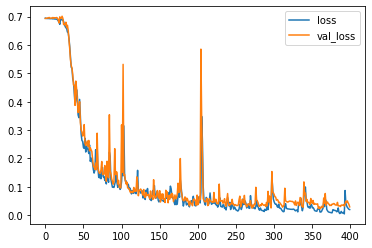

In [27]:
plt.plot(r.history['loss'], label='loss')
plt.plot(r.history['val_loss'], label='val_loss')
plt.legend()

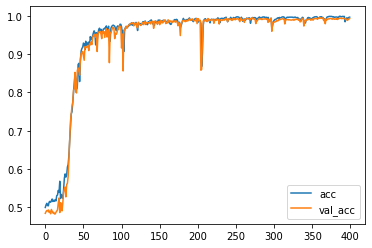

In [28]:
plt.plot(r.history['accuracy'], label='acc')
plt.plot(r.history['val_accuracy'], label='val_acc')
plt.legend()

## Step 5: Prediction

Let's skip the prediction.  It has very nice accuracy.  So LSTM performs pretty well.  

#### Note:

we can change $T = 20, 30$ and see how it works.  Also test GRU for the performance.  However, LSTM usually performs better.  